Missing values in each column:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


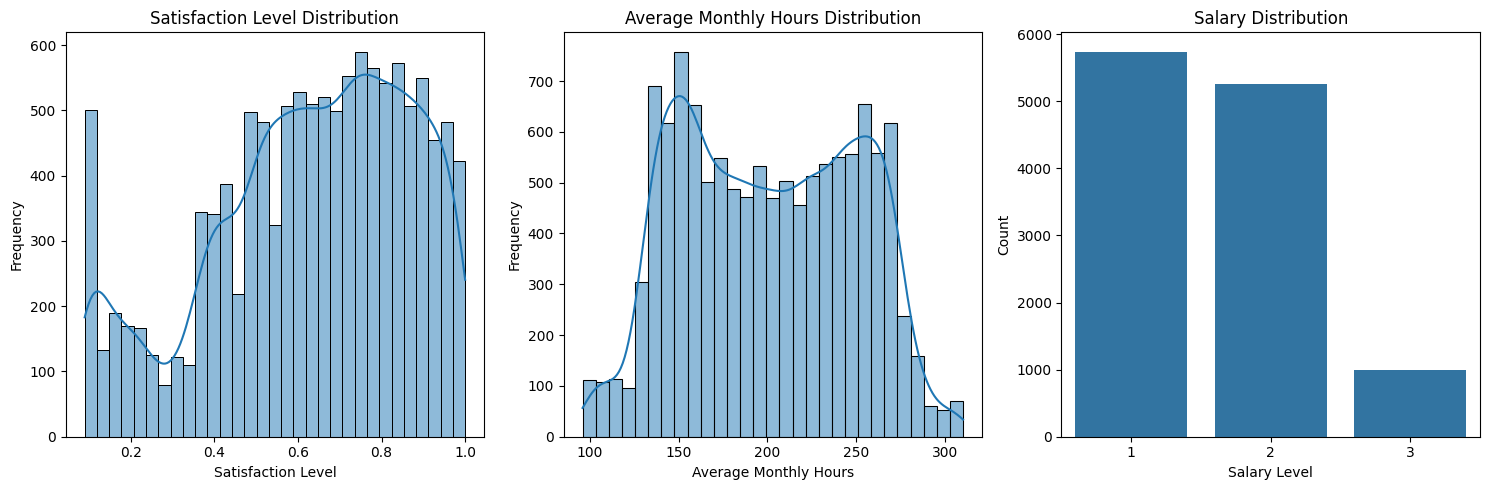

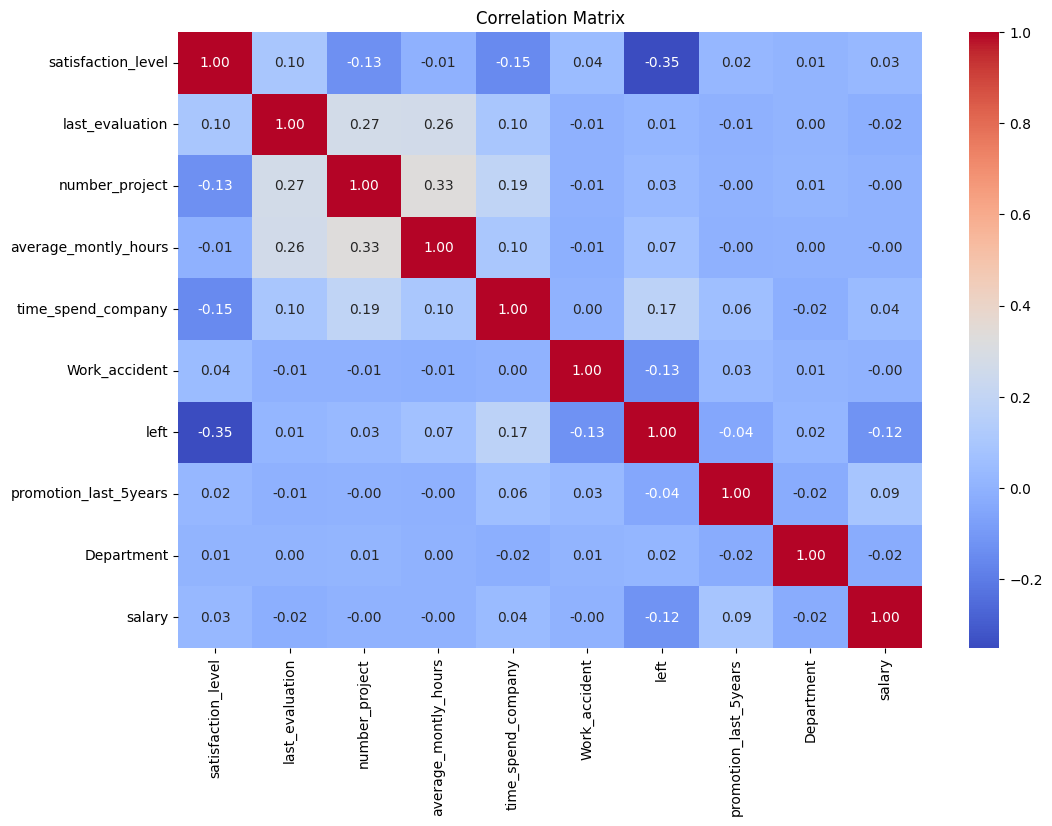

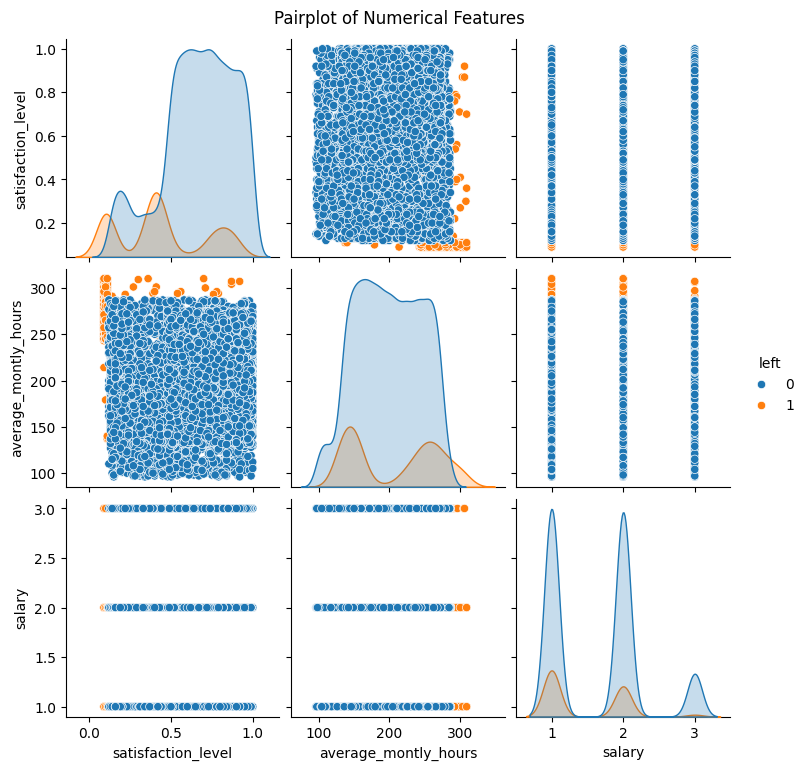

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2995
           1       0.70      0.20      0.31       603

    accuracy                           0.85      3598
   macro avg       0.78      0.59      0.62      3598
weighted avg       0.83      0.85      0.82      3598

Confusion Matrix:
[[2943   52]
 [ 481  122]]
Model Coefficients:
                      Coefficient
satisfaction_level      -3.700183
average_montly_hours     0.003011
salary                  -0.575693


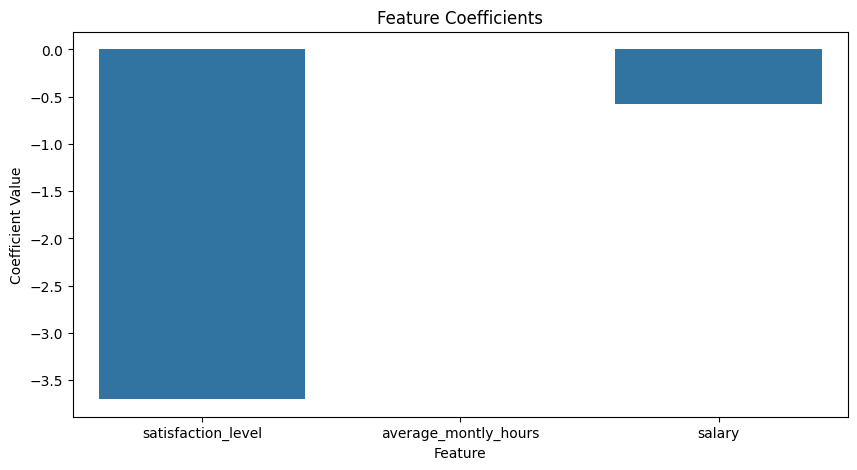

In [1]:
# RQ1: How do monthly income, work-life balance, and job satisfaction collectively impact employee turnover rates?
# Goal: To understand how these three factors interact to influence turnover and determine if there is a dominant factor.

# Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the Dataset
df = pd.read_csv('hr_dataset.csv')

# Data Preprocessing
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Remove duplicates
df = df.drop_duplicates()

# Convert categorical variables to numerical ones
df['salary'] = df['salary'].map({'low': 1, 'medium': 2, 'high': 3})
df['Department'] = df['Department'].astype('category').cat.codes

# Exploratory Data Analysis
# Visualize the distribution of satisfaction_level, average_montly_hours, and salary
plt.figure(figsize=(15, 5))

# Satisfaction Level Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['satisfaction_level'], kde=True)
plt.title('Satisfaction Level Distribution')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')

# Average Monthly Hours Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['average_montly_hours'], kde=True)
plt.title('Average Monthly Hours Distribution')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')

# Salary Distribution
plt.subplot(1, 3, 3)
sns.countplot(x='salary', data=df)
plt.title('Salary Distribution')
plt.xlabel('Salary Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Correlation Analysis
# Create a correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pairplot of Numerical Features
sns.pairplot(df[['satisfaction_level', 'average_montly_hours', 'salary', 'left']], hue='left')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# Modeling and Analysis
# Define features and target variable
X = df[['satisfaction_level', 'average_montly_hours', 'salary']]
y = df['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Analyze the coefficients
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
print("Model Coefficients:")
print(coefficients)

# Visualize the coefficients
plt.figure(figsize=(10, 5))
sns.barplot(x=coefficients.index, y='Coefficient', data=coefficients)
plt.title('Feature Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.show()